# Hackathon : Reinforcement Learning for Drone Navigation

- Team name:
- Team members names:

## 0. Prerequisites

In [1]:
# %pip install -r requirements.txt

In [2]:
%load_ext autoreload
%autoreload 2

import env
import agent
import reward
import simulate

## 1. Training

In [19]:
trained_agent, all_rewards, all_results = simulate.train('config.json')

Episode 2, Step 50000, Reward: -5050000.00, Evacuated: 0, Deactivated: 1Warning: Could only place 0 dynamic obstacles instead of 3 due to space constraints
Episode 3, Step 7, Reward: -509.00, Evacuated: 0, Deactivated: 2Warning: Could only place 0 dynamic obstacles instead of 3 due to space constraints
Episode 4, Step 14, Reward: -292.00, Evacuated: 0, Deactivated: 2Warning: Could only place 0 dynamic obstacles instead of 3 due to space constraints
Episode 5, Step 50000, Reward: -5049604.00, Evacuated: 0, Deactivated: 1Warning: Could only place 0 dynamic obstacles instead of 3 due to space constraints
Episode 6, Step 50000, Reward: -5049802.00, Evacuated: 0, Deactivated: 1Warning: Could only place 0 dynamic obstacles instead of 3 due to space constraints
Episode 7, Step 3, Reward: -303.00, Evacuated: 0, Deactivated: 2Warning: Could only place 0 dynamic obstacles instead of 3 due to space constraints
Episode 8, Step 19, Reward: -1710.00, Evacuated: 0, Deactivated: 2Warning: Could only p

In [1]:
# Plot the cumulated rewards per episode
simulate.plot_cumulated_rewards(all_rewards)

NameError: name 'simulate' is not defined

/tmp/ipykernel_19599/2065637453.py:10: DeprecationWarning: Non-integer input passed to bincount. In a future version of NumPy, this will be an error. (Deprecated NumPy 2.1)
  counts[i] = np.bincount(lst, minlength=3)
/tmp/ipykernel_19599/2065637453.py:12: DeprecationWarning: Non-integer input passed to bincount. In a future version of NumPy, this will be an error. (Deprecated NumPy 2.1)
  counts[i] = counts[i - 1] + np.bincount(lst, minlength=3)


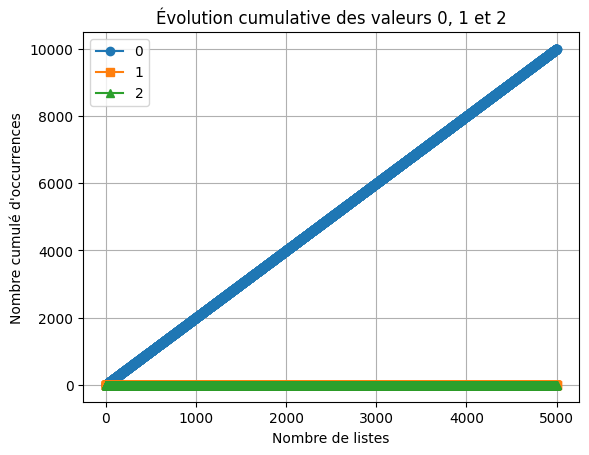

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def plot_cumulative_counts(data):
    counts = np.zeros((len(data), 3))  # Stocke le cumul pour [0, 1, 2]

    # Calculer les comptes cumulés
    for i, lst in enumerate(data):
        if i == 0:
            counts[i] = np.bincount(lst, minlength=3)
        else:
            counts[i] = counts[i - 1] + np.bincount(lst, minlength=3)

    # Affichage du graphique
    plt.plot(range(1, len(data) + 1), counts[:, 0], label='0', marker='o', linestyle='-')
    plt.plot(range(1, len(data) + 1), counts[:, 1], label='1', marker='s', linestyle='-')
    plt.plot(range(1, len(data) + 1), counts[:, 2], label='2', marker='^', linestyle='-')

    plt.xlabel("Nombre de listes")
    plt.ylabel("Nombre cumulé d'occurrences")
    plt.legend()
    plt.title("Évolution cumulative des valeurs 0, 1 et 2")
    plt.grid(True)
    plt.show()

plot_cumulative_counts(all_results)

## 2. Evaluation

In [7]:
# eval_config_paths = [f"./eval_configs/config_{i}.json" for i in range(1, 11)]
eval_config_paths = [f"./config.json"] 

In [9]:
all_results = simulate.evaluate(eval_config_paths, trained_agent)


--- Evaluating Configuration: ./config.json ---
Episode 1/10, Step 500, Reward: -50500.00, Evacuated: 0, Deactivated: 1
Episode 2/10, Step 500, Reward: -50302.00, Evacuated: 0, Deactivated: 1
Episode 3/10, Step 26, Reward: -927.00, Evacuated: 0, Deactivated: 2
Episode 4/10, Step 500, Reward: -49805.00, Evacuated: 0, Deactivated: 1
Episode 5/10, Step 29, Reward: -238.00, Evacuated: 0, Deactivated: 2
Episode 6/10, Step 500, Reward: -48213.00, Evacuated: 0, Deactivated: 1
Episode 7/10, Step 500, Reward: -50005.00, Evacuated: 0, Deactivated: 1
Episode 8/10, Step 500, Reward: -50302.00, Evacuated: 0, Deactivated: 1
Episode 9/10, Step 51, Reward: 860.00, Evacuated: 1, Deactivated: 1
Episode 10/10, Step 500, Reward: -50500.00, Evacuated: 0, Deactivated: 1


In [10]:
display(all_results)

,config_path,episode,steps,reward,evacuated,deactivated
0,./config.json,1,500,-50500.0,0,1
1,./config.json,2,500,-50302.0,0,1
2,./config.json,3,26,-927.0,0,2
3,./config.json,4,500,-49805.0,0,1
4,./config.json,5,29,-238.0,0,2
5,./config.json,6,500,-48213.0,0,1
6,./config.json,7,500,-50005.0,0,1
7,./config.json,8,500,-50302.0,0,1
8,./config.json,9,51,860.0,1,1
9,./config.json,10,500,-50500.0,0,1


In [ ]:
# Calculate averages for each configuration
averages = all_results.groupby('config_path').mean().reset_index().drop(columns=['episode'])
averages = averages.rename(columns={
    'steps': 'avg_steps',
    'reward': 'avg_reward',
    'evacuated': 'avg_evacuated',
    'deactivated': 'avg_deactivated'})

display(averages)
averages.to_csv('averages.csv', index=False)